In [51]:
#########################################################################################################################
# Kurs: Data science, studia zaoczne, Informatyka w Biznesie
# Data ostatniej poprawki: 04.12.2018
# Autorzy: Mariusz Czarny, Juliusz Sadowski, Anita Koszalko

# Celem projektu jest zastosowanie języka Python przy użyciu bibliotek pandas, nympy, itp., aby wykonać analizę danych.
# Danymi źródłowymi są pliki tekstowe: campaigns.txt, customers.txt, orderlines.txt, orders.txt, products.txt pobrane z
# serwera: https://drive.google.com/drive/folders/0B1A_5ELLOtW4VXgwOG1oZmhpS0k
# Ścieżka źródłowa dla plików: powinny znajdować się w tym samym katalogu co plik projektowy
# Wersja pythona: 3.6.3
# Plik dostępny jest także pod linkiem: 
# macierz korelacji
# funckja celu
# predykcja sprzedazy
# probka testowa/uczaca
# regresja liniowa/logistyczna

# User story: 
#########################################################################################################################

In [52]:
# import wewenętrznej bazy danych
import sqlite3

In [53]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [54]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [55]:
# sprawdza aktualną ścieżkę
%pwd

'C:\\Users\\Mariusz\\studia\\3 semestr\\Data science\\my project'

In [56]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [57]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [58]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Customers", "Orderlines", "Products", "Orders", "Campaigns"]

In [59]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie scieżki (nazwy plików pisane małymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli istnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [122]:
ordersSelect = '''SELECT orderid, totalprice from orders '''
orders = pd.read_sql_query(ordersSelect, dbConnection)
orders.head()

,orderid,totalprice
0,1002854,190.00
1,1002855,10.00
2,1002856,35.22
3,1002857,10.00
4,1002886,10.00


In [123]:
orderLinesSelect = '''SELECT orderid, productid, billdate from Orderlines '''
orderLines = pd.read_sql_query(orderLinesSelect, dbConnection)
orderLines.head()

,orderid,productid,billdate
0,1006414,10834,2011-03-08 00:00:00
1,1006541,11052,2011-01-20 00:00:00
2,1006542,11070,2011-01-20 00:00:00
3,1010154,11196,2009-11-20 00:00:00
4,1009110,11048,2009-11-12 00:00:00


In [124]:
productsSelect = '''SELECT productid, productgroupcode from Products '''
products = pd.read_sql_query(productsSelect, dbConnection)
products.columns = map(str.lower, products.columns)
products.head()

,productid,productgroupcode
0,10001,CA
1,10002,CA
2,10003,CA
3,10004,BK
4,10005,BK


In [132]:
orderlinesOrder = orderLines.merge(orders, on='orderid')
orderlinesOrder.head()

,orderid,productid,billdate,totalprice
0,1006414,10834,2011-03-08 00:00:00,36.00
1,1006414,10842,2011-01-20 00:00:00,36.00
2,1006541,11052,2011-01-20 00:00:00,20.00
3,1006542,11070,2011-01-20 00:00:00,19.12
4,1010154,11196,2009-11-20 00:00:00,14.95


In [159]:
orderlinesOrderProduct = orderlinesOrder.merge(products, on='productid')
orderlinesOrderProduct.head()

,orderid,productid,billdate,totalprice,productgroupcode
0,1006414,10834,2011-03-08 00:00:00,36.0,BK
1,1008588,10834,2011-03-09 00:00:00,88.0,BK
2,1010317,10834,2010-12-10 00:00:00,37.5,BK
3,1010318,10834,2010-12-10 00:00:00,80.0,BK
4,1009198,10834,2010-12-10 00:00:00,25.0,BK


In [238]:
orderlinesOrderProductClean = orderlinesOrderProduct.drop(['orderid','productid'], axis = 1)

In [239]:
orderlinesOrderProductClean["billdate"] = pd.to_datetime(orderlinesOrderProductClean["billdate"])

In [240]:
orderlinesOrderProductClean = orderlinesOrderProductClean[['billdate','productgroupcode','totalprice']]
orderlinesOrderProductClean.head()

,billdate,productgroupcode,totalprice
0,2011-03-08,BK,36.0
1,2011-03-09,BK,88.0
2,2010-12-10,BK,37.5
3,2010-12-10,BK,80.0
4,2010-12-10,BK,25.0


In [241]:
orderlinesOrderProductClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286017 entries, 0 to 286016
Data columns (total 3 columns):
billdate            286017 non-null datetime64[ns]
productgroupcode    286017 non-null object
totalprice          286017 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 18.7+ MB


In [242]:
orderlinesOrderProductClean = orderlinesOrderProductClean[(orderlinesOrderProductClean['billdate'] >= '2016-06-01') & (orderlinesOrderProductClean['billdate'] <= '2016-06-30')]

In [243]:
orderlinesOrderProductClean['billdate'] = pd.to_datetime(orderlinesOrderProductClean['billdate']).dt.day

In [245]:
orderlinesOrderProductClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 5187 to 285598
Data columns (total 3 columns):
billdate            4289 non-null int64
productgroupcode    4289 non-null object
totalprice          4289 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.0+ KB


In [265]:
orderlinesGrouped = orderlinesOrderProductClean.groupby(orderlinesOrderProductClean.index).agg({'billdate': 'first',
                                'productgroupcode': 'first',
                                'totalprice':sum})
orderlinesGrouped

,billdate,productgroupcode,totalprice
5187,15,AR,12.95
14386,2,AR,12.95
37024,2,BK,80.00
37025,9,BK,151.50
37026,9,BK,117.94
37027,21,BK,35.95
37028,29,BK,20.00
37029,30,BK,55.89
39292,11,AR,175.50
39293,15,AR,175.50


In [318]:
orderlinesDistinct = orderlinesGrouped.drop_duplicates(subset=['billdate','productgroupcode'],
                     inplace = True)
orderlinesDistinct = orderlinesGrouped.sort_values(by='billdate')
orderlinesDistinct

,billdate,productgroupcode,totalprice
183066,1,GA,6.95
106468,1,AR,195.00
110456,1,AP,27.94
216653,1,OT,34.95
115138,1,BK,16.00
243640,2,FR,12.95
14386,2,AR,12.95
37024,2,BK,80.00
159125,2,GA,40.85
110459,2,AP,26.95


In [319]:
orderlinesDistinct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 183066 to 249484
Data columns (total 3 columns):
billdate            159 non-null int64
productgroupcode    159 non-null object
totalprice          159 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


In [320]:
orderlinesDistinct = orderlinesDistinct[orderlinesDistinct['totalprice'] < orderlinesDistinct['totalprice'].mean()*2]

In [321]:
orderlinesDistinct

,billdate,productgroupcode,totalprice
183066,1,GA,6.95
110456,1,AP,27.94
216653,1,OT,34.95
115138,1,BK,16.00
243640,2,FR,12.95
14386,2,AR,12.95
37024,2,BK,80.00
159125,2,GA,40.85
110459,2,AP,26.95
219546,2,OT,42.90


In [322]:
orderlinesPivot = orderlinesDistinct.pivot('billdate','productgroupcode','totalprice')

In [323]:
orderlinesPivot.fillna(0, inplace=True)
orderlinesPivot

productgroupcode,AP,AR,BK,CA,FR,GA,OC,OT
billdate,,,,,,,,
1,27.94,0.00,16.00,0.00,0.00,6.95,0.00,34.95
2,26.95,12.95,80.00,39.84,12.95,40.85,35.01,42.90
3,12.95,54.95,0.00,11.99,18.95,19.88,18.95,15.00
4,12.95,12.95,0.00,31.83,12.95,20.89,61.85,49.95
7,12.95,109.90,21.00,11.99,18.95,19.88,0.00,71.88
8,100.85,0.00,81.00,26.95,60.95,77.58,34.95,104.68
9,14.95,54.95,0.00,24.95,25.95,19.90,18.95,107.75
10,26.95,54.95,14.35,0.00,54.85,17.95,38.90,62.86
11,47.90,0.00,14.00,63.70,46.70,23.90,46.70,39.89


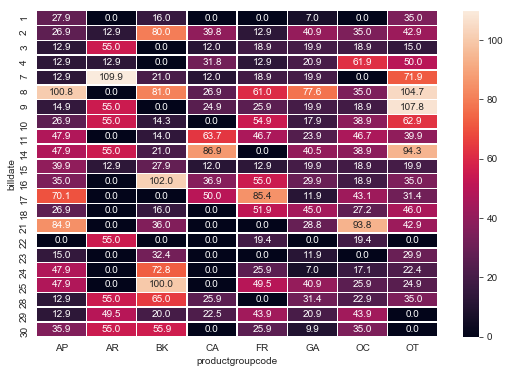

In [437]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(orderlinesPivot, annot=True, fmt=".01f", linewidths=.5, ax=ax)

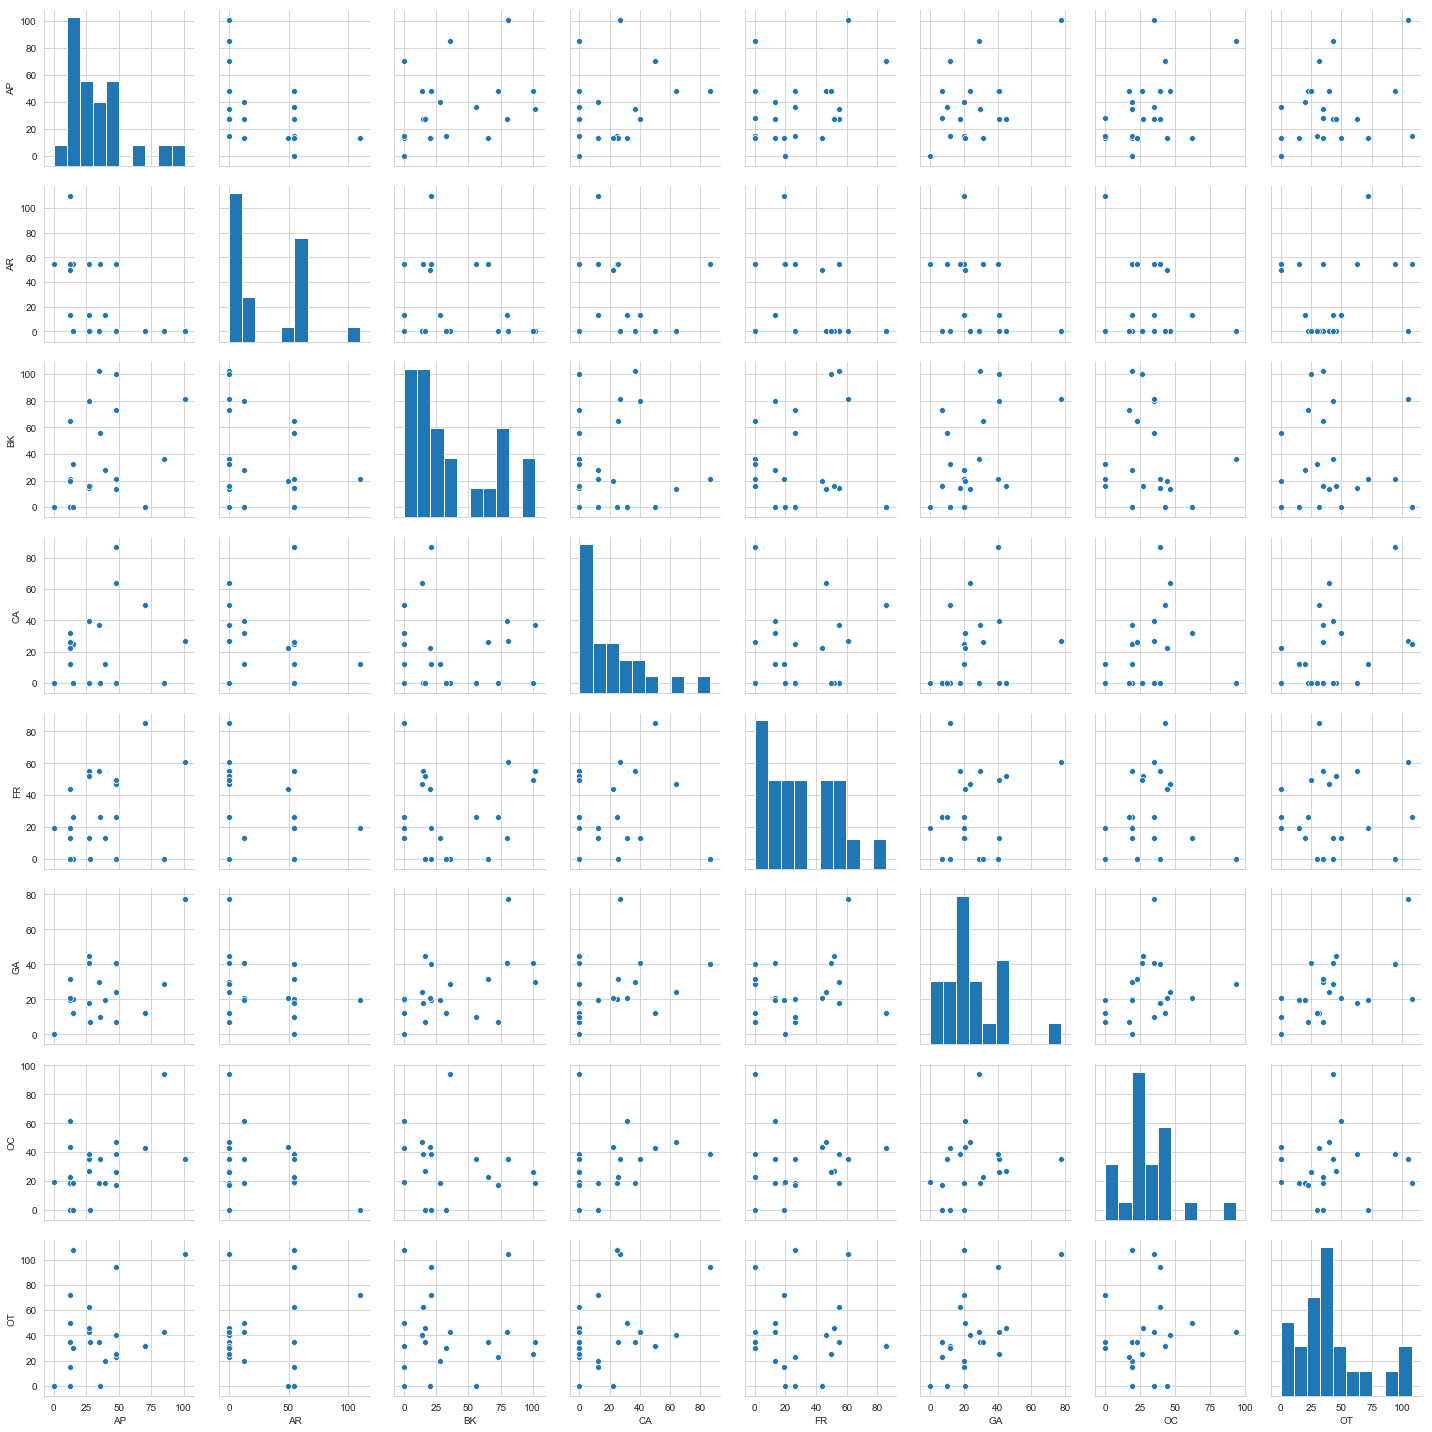

In [338]:
sns.pairplot(orderlinesPivot)

C:\Users\Mariusz\Development\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


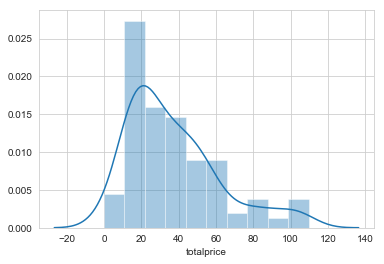

In [340]:
sns.distplot(orderlinesDistinct['totalprice'])

In [388]:
correlationTable = orderlinesPivot.corr()
correlationTable

productgroupcode,AP,AR,BK,CA,FR,GA,OC,OT
productgroupcode,,,,,,,,
AP,1.000000,-0.524269,0.350749,0.203014,0.361421,0.524281,0.477471,0.299282
AR,-0.524269,1.000000,-0.325587,-0.003987,-0.234825,-0.225513,-0.229472,0.123337
BK,0.350749,-0.325587,1.000000,-0.066396,0.107412,0.469232,-0.078470,-0.042918
CA,0.203014,-0.003987,-0.066396,1.000000,0.122860,0.301853,0.247993,0.395996
FR,0.361421,-0.234825,0.107412,0.122860,1.000000,0.243368,0.109940,0.039561
GA,0.524281,-0.225513,0.469232,0.301853,0.243368,1.000000,0.230430,0.553236
OC,0.477471,-0.229472,-0.078470,0.247993,0.109940,0.230430,1.000000,0.049737
OT,0.299282,0.123337,-0.042918,0.395996,0.039561,0.553236,0.049737,1.000000


In [454]:
X = orderlinesPivot[['AP','AR','BK','CA','FR','GA','OC','OT']]
y = orderlinesPivot['OT']

In [455]:
from sklearn.model_selection import train_test_split

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=101, shuffle=True)

In [516]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [500]:
print(lm.intercept_)

-0.6144281006716881


In [501]:
print(lm.coef_)

[ 0.06525603  0.03092661 -0.02215618  0.01254653  0.03965579  0.01178713
 -0.0954393   0.98302868]


In [502]:
predictions = lm.predict(X_test)

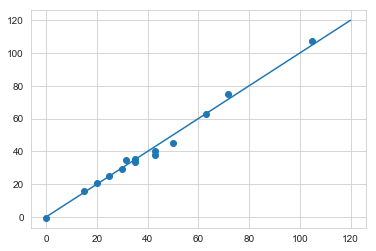

In [541]:
# Ploting Line
x = np.linspace(0, 120)
plt.scatter(y_test,predictions)
plt.plot(x, x);

In [532]:
model.score(X_test, y_test)

0.989514406321909

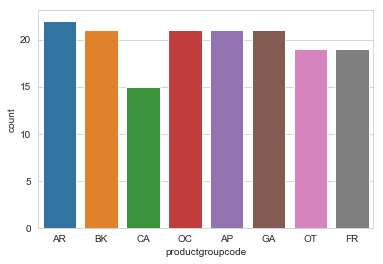

In [414]:
sns.countplot(x='productgroupcode', data=orderlinesGrouped)#, palette='coolwarm')

In [507]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

model = LinearRegression(fit_intercept=True)
model = GaussianNB()